In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail_df= pd.read_csv("retail_sales_dataset.csv") # importing dataset

In [3]:
retail_df.head(10) # checking out what we got rows wise. i see transaction ID could be set as an index.

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
retail_df.shape # checking the size of the df in question

(1000, 9)

In [5]:
retail_df.nunique() # wanting to see if transactionID is actually unique. Matches the shape

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [6]:
retail_df.Date.nunique() # date has too little unique values to be considered a good index

345

In [7]:
retail_df.Date.shape # checking if Date has less unique values than its observations. This is because i want to confirm if it can be used as an index. If the shape doesnt match the unique entries, most likely we have some duplicate dates and therefore not viable as an index.

(1000,)

In [8]:
retail_df.Date.duplicated().sum() # just to make absolutely sure

np.int64(655)

In [9]:
retail_df.set_index("Transaction ID", inplace=True) # setting the index since we know transaction ID is the most suitable and has actual unique values for each observation
retail_df

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


In [10]:
# time to set the date index to a proper value
retail_df["Date"] = pd.to_datetime(retail_df.Date, format='%Y-%m-%d') # setting it to the date time index
retail_df.dtypes # also making sure it worked nonetheless

Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [11]:
# time to see some actually useful info
# lets see what age shops the most overrall at zara
retail_df.Age.value_counts().head(10) # the dataset shows that the age group that buys most frequently mostly is between 50s ands 60s

Age
64    31
43    31
51    30
57    30
54    28
34    28
22    27
62    27
42    26
47    26
Name: count, dtype: int64

In [12]:
# lets find out the top ten best selling days for zara in this dataset
top_ten_rev = retail_df.groupby("Date").agg({
    "Total Amount" : "sum"
}).sort_values(by="Total Amount", ascending=False).head(10)

top_ten_rev

,Total Amount
Date,
2023-05-23,8455
2023-05-16,7260
2023-06-24,6220
2023-02-17,5890
2023-08-05,5205
2023-07-14,5125
2023-02-01,4700
2023-07-24,4610
2023-04-01,4400


In [13]:
# okay lets do some visualization
# first lets see the sales over the recorded dataset
retail_df

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


Text(0.5, 1.0, 'Total Amount over Time')

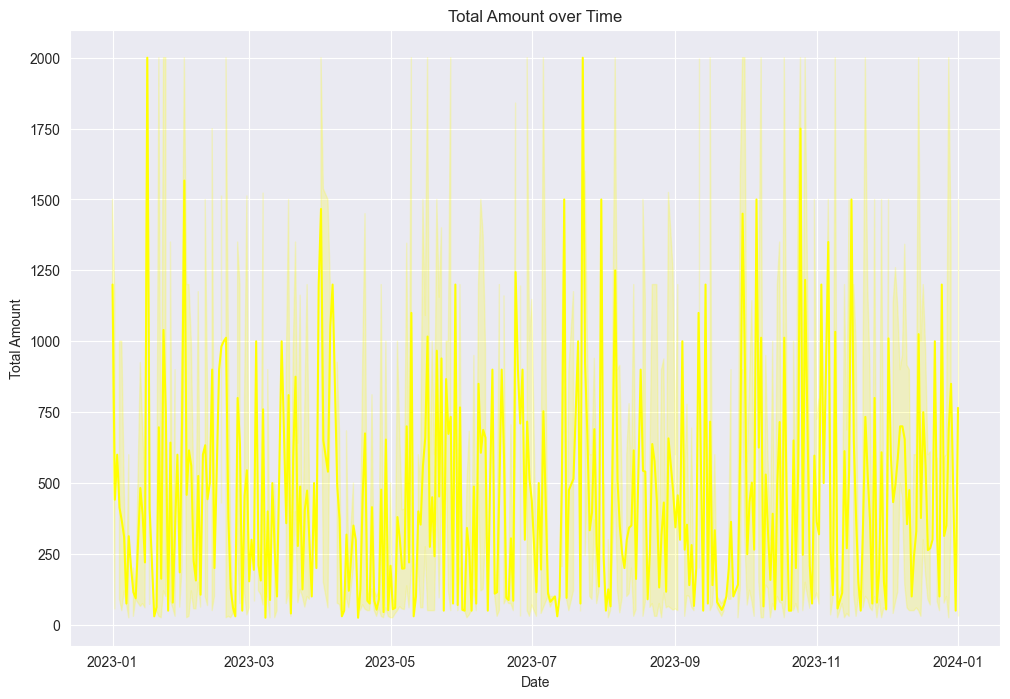

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x="Date", y="Total Amount", data=retail_df, color="yellow")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.title("Total Amount over Time")


We can see that Zara's sales suggest that Zara has a continous cycle of low sales and high values with outliers skewed toward the lower end. However, I'd like to prove that next


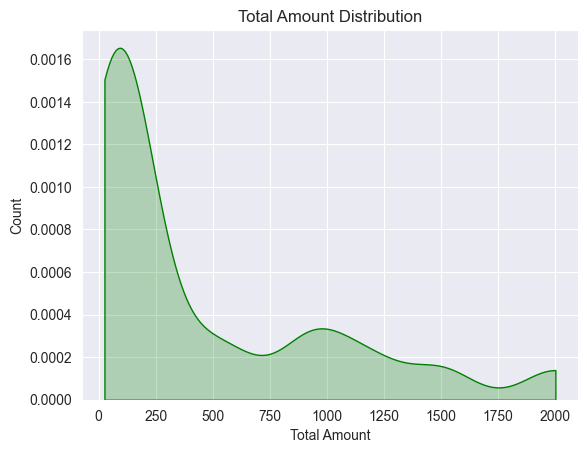

In [15]:
sales_distribution = sns.kdeplot(x="Total Amount", data=retail_df, fill=True, color="green", cut=0)
plt.ylim(bottom=0)

plt.xlabel("Total Amount")
plt.ylabel("Count")
plt.title("Total Amount Distribution")
plt.show()

As we can see, the distribution of sales leans heavily toward the lower end of the total amount. We can conclude that Zara's sales rely on high quantity, low price over high price, low quantity. This leads me to believe that Zara should focus on advertising its cheaper options creating more revenue.

In [16]:
# speaking of sales counts, lets see which category has the most quantity sold
product_quant = retail_df.groupby("Product Category").agg({
"Quantity" : "sum"
}).sort_values(by="Quantity", ascending=False)
product_quant

,Quantity
Product Category,
Clothing,894
Electronics,849
Beauty,771


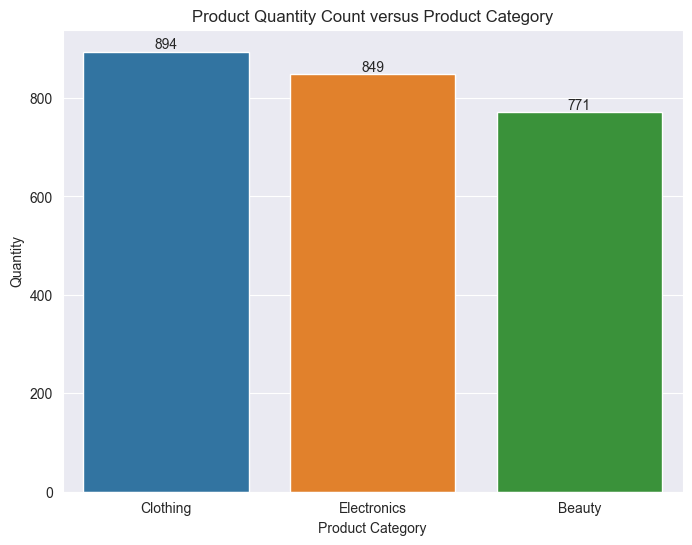

In [28]:
# as expected, clothing dominates but surprisingly electronics isn't far behind with beauty last
fig, ax = plt.subplots(figsize=(8, 6))
category_graph = sns.barplot(x=product_quant.index, y="Quantity", data=product_quant, hue="Product Category", ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Product Category")
plt.ylabel("Quantity")
plt.title("Product Quantity Count versus Product Category")
plt.show()

Clothing leads the way with Beauty being the least. Zara's highest selling product remains its clothing

In [18]:
# lets do something a bit more advanced, lets find out which gender spends more in each category on average
retail_df # first lets remind ourselves what we're working with

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
998,2023-10-29,CUST998,Female,23,Beauty,4,25,100


In [19]:
total_avg_gend = retail_df.groupby(["Product Category", "Gender"]).agg({
    "Total Amount" : "mean"
}).round(2)
total_avg_gend

Total Amount
Product Category Gender              
Beauty           Female        450.78
                 Male          487.13
Clothing         Female        467.10
                 Male          419.80
Electronics      Female        451.38
                 Male          466.10

we can see men spend more on average for beauty items, women spend far more on average on clothing, and men take the lead once again in electronics

In [20]:
# lets visualize that.
total_avg_gend.reset_index(inplace=True) # to make data manipulation easier

In [21]:
total_avg_gend # just checking

,Product Category,Gender,Total Amount
0,Beauty,Female,450.78
1,Beauty,Male,487.13
2,Clothing,Female,467.10
3,Clothing,Male,419.80
4,Electronics,Female,451.38
5,Electronics,Male,466.10


Text(0.5, 1.0, 'Total Amount on Average per Gender')

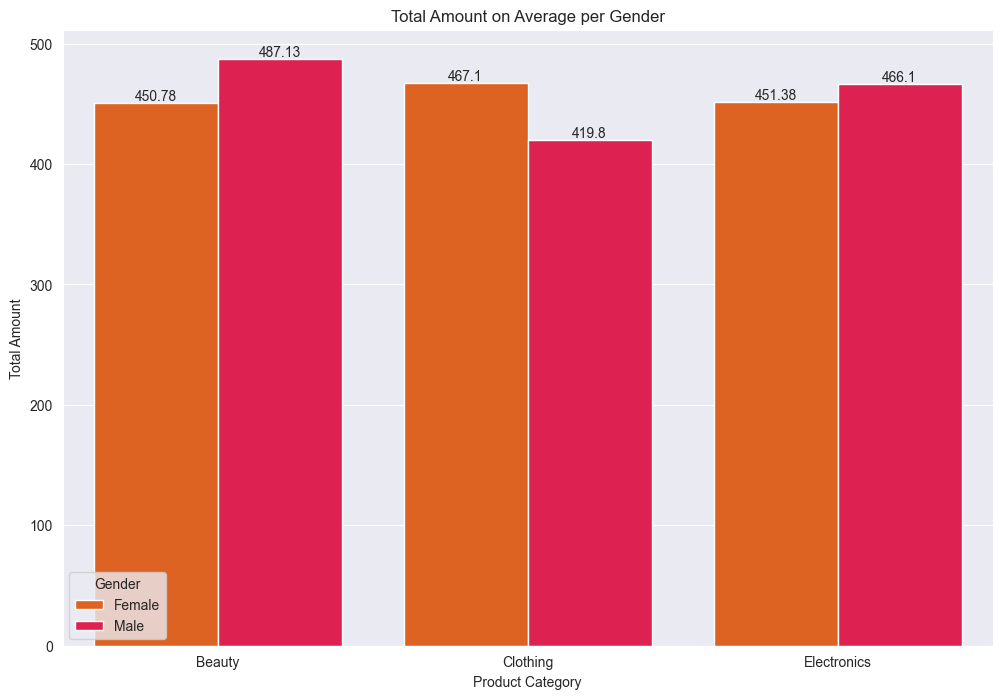

In [27]:
fig, ax = plt.subplots(figsize=(12, 8)) # setting the size
color_list = ["#fc5a03", "#fc0341"] # getting a list of colors for the palette

category_avg = sns.barplot(x="Product Category", y="Total Amount", data=total_avg_gend, hue="Gender", ax=ax, palette=color_list)
for container in ax.containers:
    ax.bar_label(container) # to set labels efficiently and increase graph transparency
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.title("Total Amount on Average per Gender")

As seen by the graph, Men and women share an equal standing in expenses with each gender showing towards particular product category as opposed to a single skewed view.